In [1]:
from mypgm.mining import action_table, best_actions, add_label, get_auc_scores, plot_roc_curve, show_cm
from mypgm.base import RandomVar, Factor
from mypgm.exacted import ArcInversion
from mypgm.pgms import InfluenceDiagram
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

In [2]:
# Car example
L = RandomVar('Lemon', 2) # y/n
R = RandomVar('Report', 3)  # good, bad, none
I = RandomVar('Inspect', 2) # y/n
B = RandomVar('Buy', 2) # y/n

# This function convert the variables to a table of possible actions.
t = action_table([I, R, B, L])
# Use an example optimal strategy from heuristic solution
optimal_trial = [Factor([B, R, I], [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1], mod='decision'), Factor([I], [1, 0], mod='decision')]
# This function is adding a label regarding the optimaliity of each action according to the supposed strategy.
train = add_label(t, optimal_trial)

Max EU at iteration 0: 1.18003626
Starting simulation...
Max EU at the end: 3.3978492000000005
End simulation: time spend = 12.13454794883728
Best: [0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0]
Optimal strategy: [CT 
(0,) -> 0
(1,) -> 1
, Treatment CT Results Mediastinoscopy Results Mediastinoscopy Death CT Mediastinoscopy? 
(0, 0, 0, 0, 0, 0) -> 1
(0, 0, 0, 0, 0, 1) -> 0
(0, 0, 0, 0, 1, 0) -> 1
(0, 0, 0, 0, 1, 1) -> 0
(0, 0, 0, 1, 0, 0) -> 1
(0, 0, 0, 1, 0, 1) -> 1
(0, 0, 0, 1, 1, 0) -> 0
(0, 0, 0, 1, 1, 1) -> 1
(0, 0, 1, 0, 0, 0) -> 1
(0, 0, 1, 0, 0, 1) -> 1
(0, 0, 1, 0, 1, 0) -> 1
(0, 0, 1, 0, 1, 1) -> 0
(0, 0, 1, 1, 0, 0) -> 0
(0, 0, 1, 1, 0, 1) -> 1
(0, 0, 1, 1, 1, 0) -> 1
(0, 0, 1, 1, 1, 1) -> 1
(0, 0, 2, 0, 0, 0) -> 0
(0, 0, 2, 0, 0, 1) -> 1
(0, 0, 2, 0, 1, 0) -> 1
(0, 0, 2, 0, 1, 1) -> 0
(

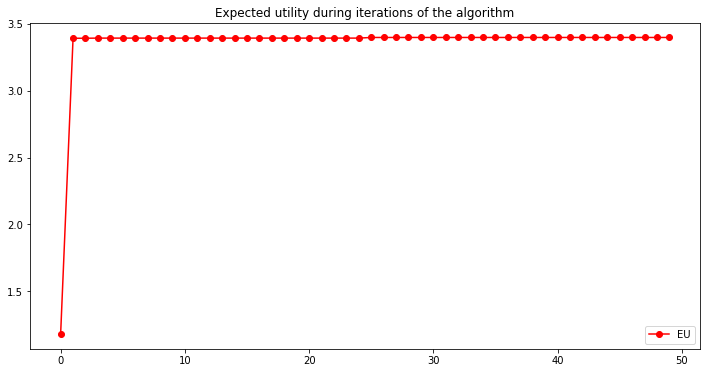

In [3]:
# Clinical example
A = RandomVar('CT Results', k=3)
A_dict = {0: 'CT result 0', 1: 'CT result 1', 2: 'CT result 2'}
B = RandomVar('Mediastinal Metastases', k=2)
B_dict = {0: 'No Mediastinal Metastases', 1: 'Mediastinal Metastases'}
C = RandomVar('Mediastinoscopy Results', k=3)
C_dict = {0: 'Mediastinal Metastases Result 1', 1: 'Mediastinal Metastases Result 2', 2: 'Mediastinal Metastases Result 2'}
D = RandomVar('Treatments Death', k=2) #survive/died
D_dict = {0: 'Survive to treatment', 1: 'No survive to tratment'}
E = RandomVar('Mediastinoscopy Death', k=2) #survive/died
E_dict = {0: 'Survive to Mediastinoscopy', 1: 'No survive to Mediastinoscopy'}

F = RandomVar('CT', k=2, mod='decision')
F_dict = {0: 'No CT', 1: 'CT'}
G = RandomVar('Treatment', k=2, mod='decision') #thoracotomy/radio
G_dict = {0: 'Thoracotomy', 1: 'Radio'}
H = RandomVar('Mediastinoscopy?', k=2, mod='decision')
H_dict = {0: 'No Mediastinoscopy', 1: 'Mediastinoscopy'}

I_dict = {0: 'Sub-optimal', 1: 'Optimal'}

cA_FB = Factor([A, F, B], values=[0, 0,  0.19, 0.82, 0, 0, 0.81, 0.18, 1, 1, 0, 0])
#cA_FB.to_dataframe()
cB = Factor([B], [0.52, 0.46])
cC_BH = Factor([C, B, H], [0, 0, 0.005, 0.82, 0, 0, 0.995, 0.18, 1, 1, 0, 0])
cD_G = Factor([D, G], [0.963,  0.998, 0.037, 0.002])
cE_H = Factor([E, H], [1, 0.995, 0, 0.005])

dF = Factor([F])
dG = Factor([G, A, C, E, F, H])
dH = Factor([H, A, F])
# important: no forgetting arcs in decision also for utility node
LifeExperience = Factor([E, D, G, B, F, H], [4.45, 4.45, 4.45, 1.8, 1.8, 1.8, 2.64, 2.64, 2.64, 1.8, 1.8, 1.8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], mod='utility')
# define the ID
dg = InfluenceDiagram([cA_FB, cC_BH, cD_G, cE_H, cB], [LifeExperience], [dF, dG, dH])
# table of actions
t = action_table([A, B, C, D, E, F, G, H])
# run the decision algorithm
#ai = ArcInversion(dg)
#ai.solve()
# save results
#optimal_trial = ai.decisions
from mypgm.approximated import heuristicID
# logically, it requires more epochs to find the exact sol! the ID is huger
h = heuristicID(dg, [dF, dG, dH])
h.run_algorithm(max_epochs = 50, mut=0.9, population_size = 4, crossp=0.8)

In [4]:
optimal_trial = h.solution

In [5]:
from sklearn.model_selection import train_test_split
# Convert in training set
train = add_label(t, optimal_trial)
# Now we have vectors for data mining evaluation
y = train.loc[:, ['Optimal']]
X = train.loc[:, train.columns != 'Optimal']
X_train, X_test, y_train, y_test = train_test_split(X,y)

names = list(X_train.keys())
labels = list(I_dict.values())

Test accuracy: 1.0
Test accuracy: 0.9583333333333334
Training AUC: 1.0
Testing AUC: 0.9285714285714286


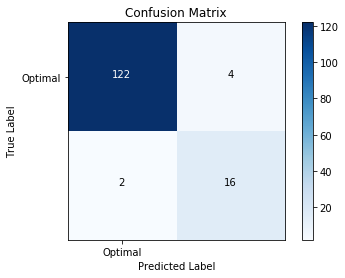

In [6]:
# decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
import graphviz

y_train_hat = dt.predict(X_train)
y_test_hat = dt.predict(X_test)
# accuracy
print('Test accuracy: {}'.format(accuracy_score(y_train, y_train_hat)))
print('Test accuracy: {}'.format(accuracy_score(y_test, y_test_hat)))
# ROC
y_test_score_tree = get_auc_scores(dt, X_train, X_test, y_train, y_test)
#plot_roc_curve(y_test, y_test_score) 
# confusion matrix
show_cm(y_test, y_test_hat)


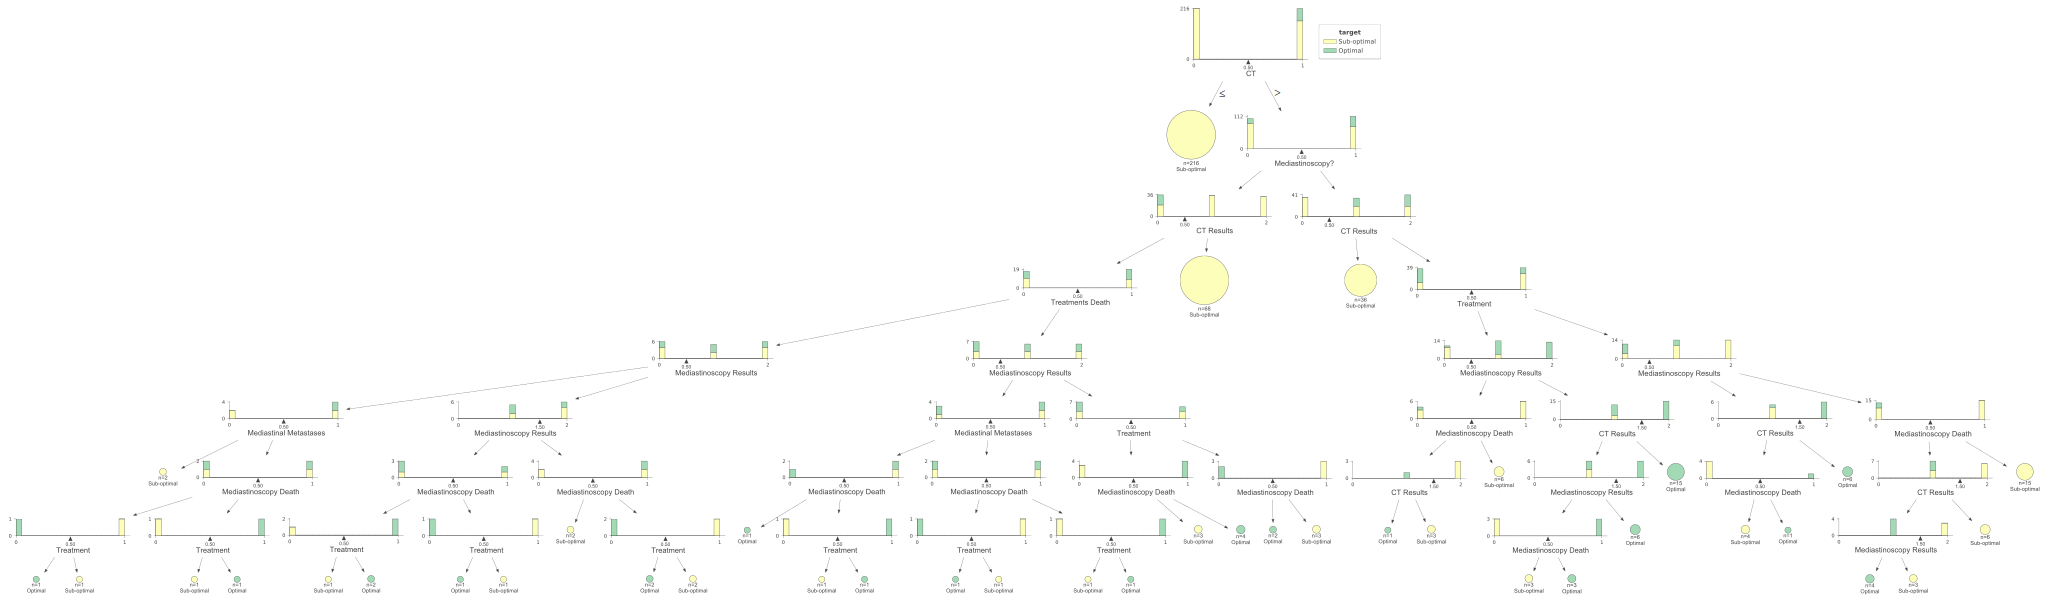

In [8]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(dt, X_train.to_numpy(), np.ravel(y_train),
                target_name="target",
                feature_names=names, class_names=labels)

viz

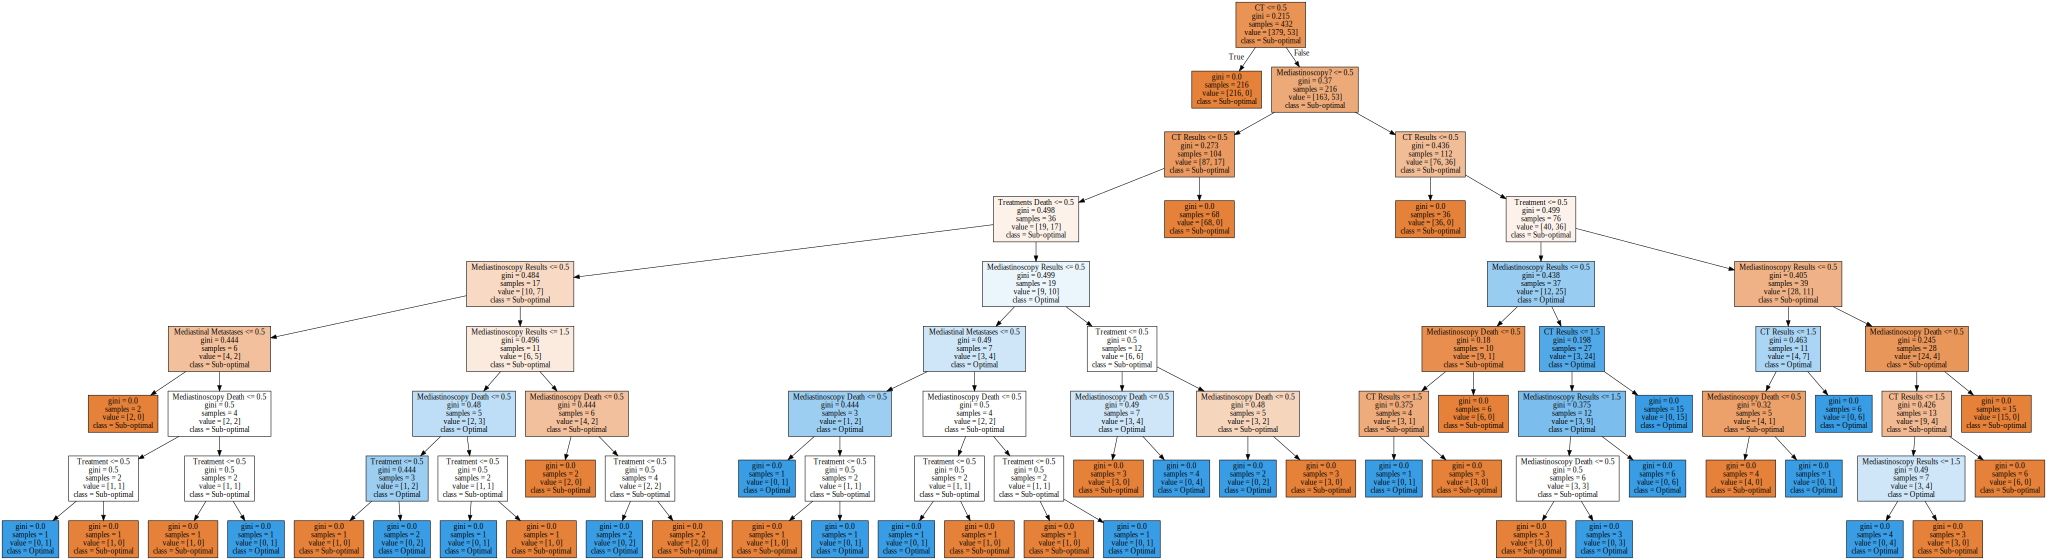

In [9]:
dot_data = tree.export_graphviz(dt, out_file=None, feature_names=names, filled=True, class_names=labels) 
graph = graphviz.Source(dot_data) 
graph

Test accuracy: 0.875
Test accuracy: 0.875
Training AUC: 0.964530668234372
Testing AUC: 0.9387125220458554


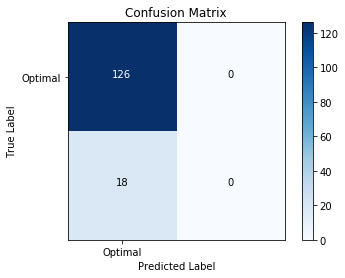

In [7]:
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors

# SVM
svm = SVC(gamma='auto', probability=True)
svm.fit(X_train, np.ravel(y_train))

y_train_hat = svm.predict(X_train)
y_test_hat = svm.predict(X_test)
# accuracy
print('Test accuracy: {}'.format(accuracy_score(y_train, y_train_hat)))
print('Test accuracy: {}'.format(accuracy_score(y_test, y_test_hat)))
# ROC
y_test_score_svm = get_auc_scores(svm, X_train, X_test, y_train, y_test)
#plot_roc_curve(y_test, y_test_score) 
# confusion matrix
show_cm(y_test, y_test_hat)

Test accuracy: 0.9444444444444444
Test accuracy: 0.9166666666666666
Training AUC: 0.9707524985302763
Testing AUC: 0.8842592592592593


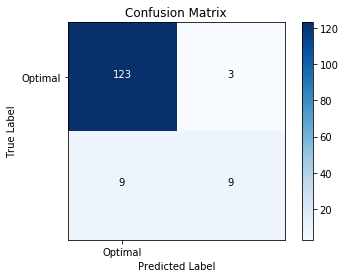

In [8]:
from sklearn.neighbors import KNeighborsClassifier
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, np.ravel(y_train))
y_train_hat = knn.predict(X_train)
y_test_hat = knn.predict(X_test)
# accuracy
print('Test accuracy: {}'.format(accuracy_score(y_train, y_train_hat)))
print('Test accuracy: {}'.format(accuracy_score(y_test, y_test_hat)))
# ROC
y_test_score_knn = get_auc_scores(knn, X_train, X_test, y_train, y_test)
#plot_roc_curve(y_test, y_test_score) 
# confusion matrix
show_cm(y_test, y_test_hat)

Test accuracy: 0.6180555555555556
Test accuracy: 0.6458333333333334
Training AUC: 0.8542034097589654
Testing AUC: 0.8686067019400353


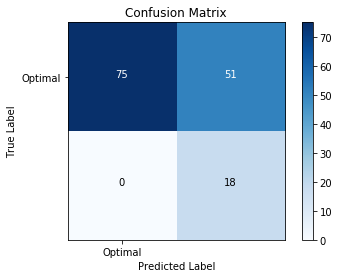

In [9]:
from sklearn.naive_bayes import GaussianNB
# KNN
nb = GaussianNB()
nb.fit(X_train, np.ravel(y_train))
y_train_hat = nb.predict(X_train)
y_test_hat = nb.predict(X_test)
# accuracy
print('Test accuracy: {}'.format(accuracy_score(y_train, y_train_hat)))
print('Test accuracy: {}'.format(accuracy_score(y_test, y_test_hat)))
# ROC
y_test_score_bn = get_auc_scores(nb, X_train, X_test, y_train, y_test)
#plot_roc_curve(y_test, y_test_score) 
# confusion matrix
show_cm(y_test, y_test_hat)

Test accuracy: 0.875
Test accuracy: 0.875
Training AUC: 0.8580246913580247
Testing AUC: 0.8721340388007055


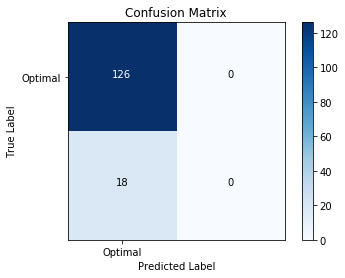

In [12]:
# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, np.ravel(y_train))
y_train_hat = lda.predict(X_train)
y_test_hat = lda.predict(X_test)
# accuracy
print('Test accuracy: {}'.format(accuracy_score(y_train, y_train_hat)))
print('Test accuracy: {}'.format(accuracy_score(y_test, y_test_hat)))
# ROC
y_test_score_lda = get_auc_scores(lda, X_train, X_test, y_train, y_test)
#plot_roc_curve(y_test, y_test_score) 
# confusion matrix
show_cm(y_test, y_test_hat)

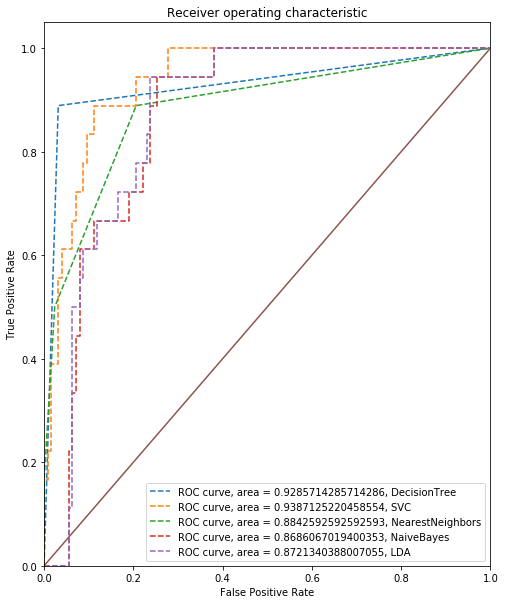

In [13]:
plot_roc_curve(y_test, [y_test_score_tree, y_test_score_svm, y_test_score_knn, y_test_score_bn, y_test_score_lda], ['DecisionTree', 'SVC', 'NearestNeighbors', 'NaiveBayes', 'LDA']) 

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score

clu = KMeans(n_clusters = 2, random_state=0, tol=0.00001, max_iter=3000)
clu.fit(X_train)
y_labels_train = clu.labels_
y_labels_test = clu.predict(X_test)

# non c'è un cluster originale quindi non li conosco i true.
# metrics.rand_score(labels_true, labels_pred)
print(f'Silhoutte score:', silhouette_score(X_train, y_labels_train, metric='euclidean'))

# add clusters as features
X_train['km_clust'] = y_labels_train
X_test['km_clust'] = y_labels_test

Silhoutte score: 0.16426237431575924


In [11]:
# convert train to categorical for mining ass. rules
categorical_train = pd.DataFrame()
train.head()

,CT Results,Mediastinal Metastases,Mediastinoscopy Results,Treatments Death,Mediastinoscopy Death,CT,Treatment,Mediastinoscopy?,Optimal
0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,1,0.0
2,0,0,0,0,0,0,1,0,0.0
3,0,0,0,0,0,0,1,1,0.0
4,0,0,0,0,0,1,0,0,1.0


In [12]:
categorical_train['CT Results'] = train['CT Results'].map(lambda value: A_dict[value])
categorical_train['Mediastinal Metastases'] = train['Mediastinal Metastases'].map(lambda value: B_dict[value])
categorical_train['Mediastinoscopy Results'] = train['Mediastinoscopy Results'].map(lambda value: C_dict[value])
categorical_train['Treatments Death'] = train['Treatments Death'].map(lambda value: D_dict[value])
categorical_train['Mediastinoscopy Death'] = train['Mediastinoscopy Death'].map(lambda value: E_dict[value])
categorical_train['CT'] = train['CT'].map(lambda value: F_dict[value])
categorical_train['Treatment'] = train['Treatment'].map(lambda value: G_dict[value])
categorical_train['Mediastinoscopy?'] = train['Mediastinoscopy?'].map(lambda value: H_dict[value])
categorical_train['Optimal'] = train['Optimal'].map(lambda value: I_dict[value])

In [13]:
categorical_train.head()

,CT Results,Mediastinal Metastases,Mediastinoscopy Results,Treatments Death,Mediastinoscopy Death,CT,Treatment,Mediastinoscopy?,Optimal
0,CT result 0,No Mediastinal Metastases,Mediastinal Metastases Result 1,Survive to treatment,Survive to Mediastinoscopy,No CT,Thoracotomy,No Mediastinoscopy,Sub-optimal
1,CT result 0,No Mediastinal Metastases,Mediastinal Metastases Result 1,Survive to treatment,Survive to Mediastinoscopy,No CT,Thoracotomy,Mediastinoscopy,Sub-optimal
2,CT result 0,No Mediastinal Metastases,Mediastinal Metastases Result 1,Survive to treatment,Survive to Mediastinoscopy,No CT,Radio,No Mediastinoscopy,Sub-optimal
3,CT result 0,No Mediastinal Metastases,Mediastinal Metastases Result 1,Survive to treatment,Survive to Mediastinoscopy,No CT,Radio,Mediastinoscopy,Sub-optimal
4,CT result 0,No Mediastinal Metastases,Mediastinal Metastases Result 1,Survive to treatment,Survive to Mediastinoscopy,CT,Thoracotomy,No Mediastinoscopy,Optimal


In [29]:
from mlxtend.preprocessing import TransactionEncoder
# preprocessing
te = TransactionEncoder()
te_array = te.fit(categorical_train.values.tolist()).transform(categorical_train.values.tolist())
df = pd.DataFrame(te_array, columns=te.columns_)

In [30]:
df.head()

,CT,CT result 0,CT result 1,CT result 2,Mediastinal Metastases,Mediastinal Metastases Result 1,Mediastinal Metastases Result 2,Mediastinoscopy,No CT,No Mediastinal Metastases,No Mediastinoscopy,No survive to Mediastinoscopy,No survive to tratment,Optimal,Radio,Sub-optimal,Survive to Mediastinoscopy,Survive to treatment,Thoracotomy
0,False,True,False,False,False,True,False,False,True,True,True,False,False,False,False,True,True,True,True
1,False,True,False,False,False,True,False,True,True,True,False,False,False,False,False,True,True,True,True
2,False,True,False,False,False,True,False,False,True,True,True,False,False,False,True,True,True,True,False
3,False,True,False,False,False,True,False,True,True,True,False,False,False,False,True,True,True,True,False
4,True,True,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,False,False,False,True,True,False,True,True,True,False,False,True,True,False,True,True,False,False,False
572,True,False,False,True,True,False,True,False,False,False,True,True,True,True,False,False,False,False,True
573,True,False,False,True,True,False,True,True,False,False,False,True,True,False,False,True,False,False,True
574,True,False,False,True,True,False,True,False,False,False,True,True,True,False,True,True,False,False,False


In [31]:
from mlxtend.frequent_patterns import apriori
# apriori
frequent_itemsets_ap = apriori(df, min_support=0.01, use_colnames=True)

In [32]:
print(frequent_itemsets_ap)

        support                                           itemsets
0      0.500000                                               (CT)
1      0.333333                                      (CT result 0)
2      0.333333                                      (CT result 1)
3      0.333333                                      (CT result 2)
4      0.500000                           (Mediastinal Metastases)
...         ...                                                ...
13286  0.010417  (No survive to Mediastinoscopy, Sub-optimal, M...
13287  0.010417  (No survive to tratment, Survive to Mediastino...
13288  0.010417  (No survive to tratment, Survive to Mediastino...
13289  0.010417  (Survive to Mediastinoscopy, Sub-optimal, Radi...
13290  0.010417  (Survive to Mediastinoscopy, Sub-optimal, Medi...

[13291 rows x 2 columns]


In [33]:
from mlxtend.frequent_patterns import fpgrowth
# fp-growth
frequent_itemsets_fp=fpgrowth(df, min_support=0.01, use_colnames=True)
print(frequent_itemsets_fp)

        support                                           itemsets
0      0.875000                                      (Sub-optimal)
1      0.500000                                      (Thoracotomy)
2      0.500000                               (No Mediastinoscopy)
3      0.500000                                            (No CT)
4      0.500000                             (Survive to treatment)
...         ...                                                ...
13286  0.048611  (No survive to tratment, Mediastinal Metastase...
13287  0.194444  (Sub-optimal, Mediastinal Metastases Result 2,...
13288  0.145833  (Sub-optimal, Mediastinal Metastases, CT resul...
13289  0.111111  (Mediastinal Metastases Result 2, Mediastinal ...
13290  0.097222  (Sub-optimal, Mediastinal Metastases Result 2,...

[13291 rows x 2 columns]


In [34]:
# mine the rules
from mlxtend.frequent_patterns import association_rules
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.8)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)

In [35]:
print(rules_ap)

                                            antecedents    consequents  \
0                                             (Optimal)           (CT)   
1                                         (CT result 0)  (Sub-optimal)   
2                                         (CT result 1)  (Sub-optimal)   
3                                         (CT result 2)  (Sub-optimal)   
4                              (Mediastinal Metastases)  (Sub-optimal)   
...                                                 ...            ...   
7998  (No survive to tratment, Survive to Mediastino...        (No CT)   
7999  (No survive to tratment, Survive to Mediastino...  (Sub-optimal)   
8000  (Survive to Mediastinoscopy, Radio, Mediastina...  (Sub-optimal)   
8001  (Survive to Mediastinoscopy, Sub-optimal, Medi...        (No CT)   
8002  (Survive to Mediastinoscopy, Mediastinal Metas...  (Sub-optimal)   

      antecedent support  consequent support   support  confidence      lift  \
0               0.125000       

In [36]:
print(rules_fp)

                                            antecedents    consequents  \
0                                               (No CT)  (Sub-optimal)   
1                           (No CT, No Mediastinoscopy)  (Sub-optimal)   
2     (No CT, Mediastinal Metastases Result 2, No Me...  (Sub-optimal)   
3     (No CT, Mediastinal Metastases, No Mediastinos...  (Sub-optimal)   
4     (No CT, Mediastinal Metastases Result 2, Media...  (Sub-optimal)   
...                                                 ...            ...   
7998  (No survive to tratment, Mediastinal Metastase...  (Sub-optimal)   
7999  (No survive to tratment, Mediastinal Metastase...  (Sub-optimal)   
8000     (Mediastinal Metastases Result 2, CT result 2)  (Sub-optimal)   
8001              (Mediastinal Metastases, CT result 2)  (Sub-optimal)   
8002  (Mediastinal Metastases Result 2, Mediastinal ...  (Sub-optimal)   

      antecedent support  consequent support   support  confidence      lift  \
0               0.500000       